In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [4]:
country = pd.read_csv('Country-data.csv', index_col=0)

In [5]:
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(country)

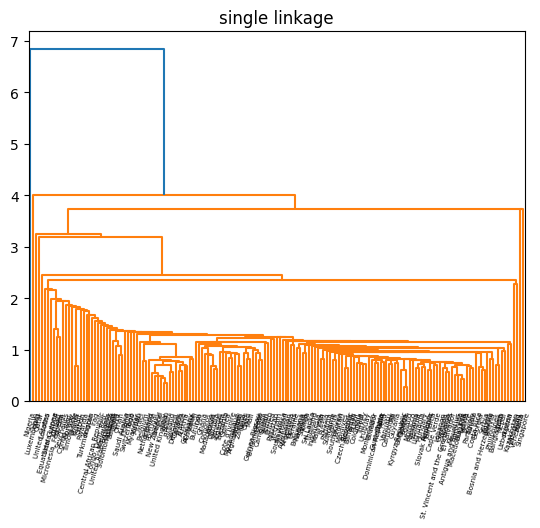

Best no. of clusters: 2
Best Score: 0.3153134331018189


In [6]:
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

In [11]:
from sklearn.cluster import KMeans


Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24, init='random')
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 5
Best Score: 0.3064507657886972


In [14]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24, init='random')
clust.fit(df_scaled)

KMeans(init='random', n_clusters=5, random_state=24)

In [15]:
clust_data = country.copy()
clust_data['Clust'] = clust.labels_

clust_data.groupby('Clust').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clust,,,,,,,,,
0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,92.156522,29.235000,6.417174,42.865217,3916.152174,10.020109,59.158696,4.990000,1913.521739
2,21.384706,41.377518,6.260824,48.294893,12988.941176,6.586718,72.985882,2.280235,6891.905882
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,57.733333,33.500000,5.140000,30.566667,9786.666667,63.033333,67.366667,3.650000,6160.000000


In [16]:
clust_data.to_csv('Clust_cont.csv')

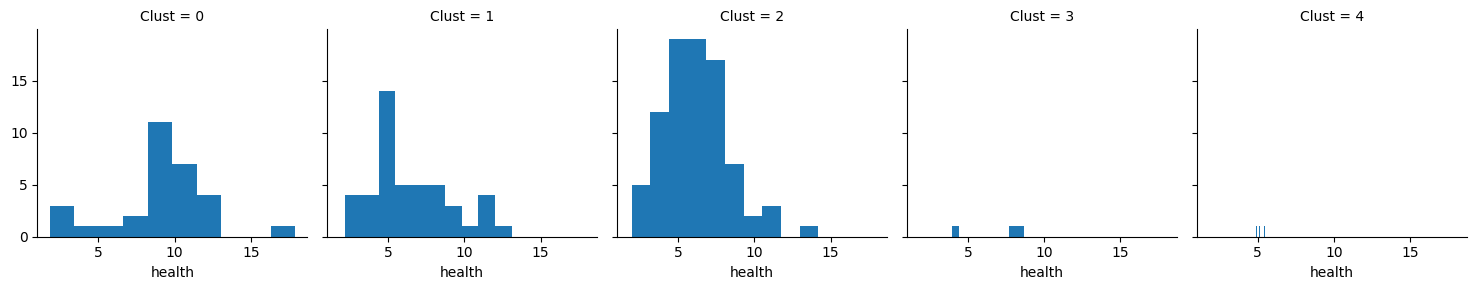

In [22]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.hist, 'health')
plt.show()

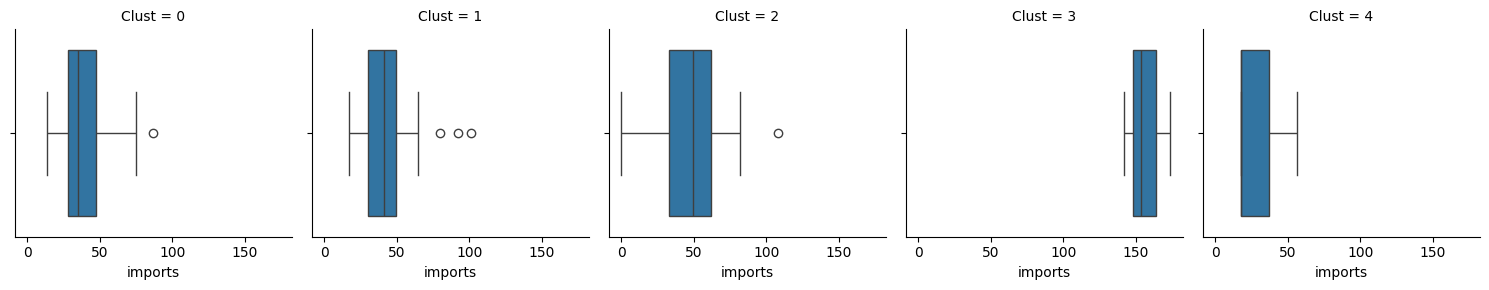

In [21]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(sns.boxplot, 'imports')
plt.show()

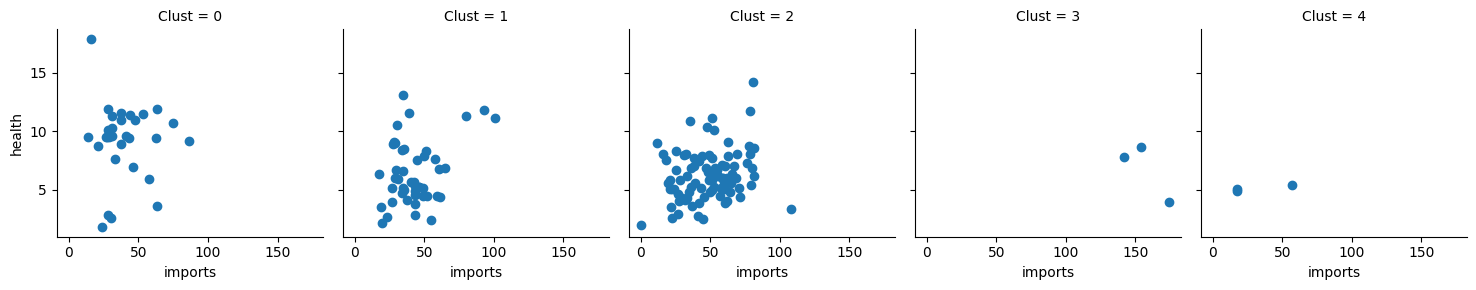

In [25]:
g = sns.FacetGrid(data=clust_data, col='Clust')
g.map(plt.scatter, 'imports', 'health')
plt.show()